# Introduction to Machine Learning

commons banyak digunaka
supervised
unsupervised

jarang + complex + jarang digunakan di bisnis
semi supervised
reinforcment learning
self supervised learning



## Supervised vs Unsupervised

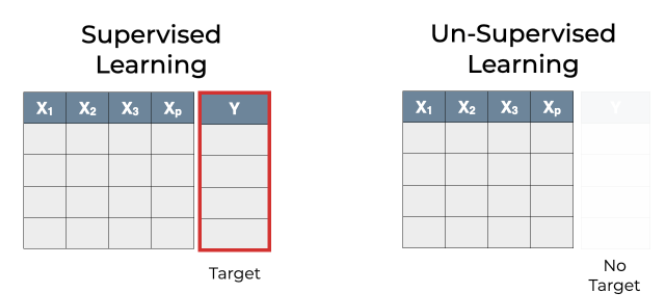

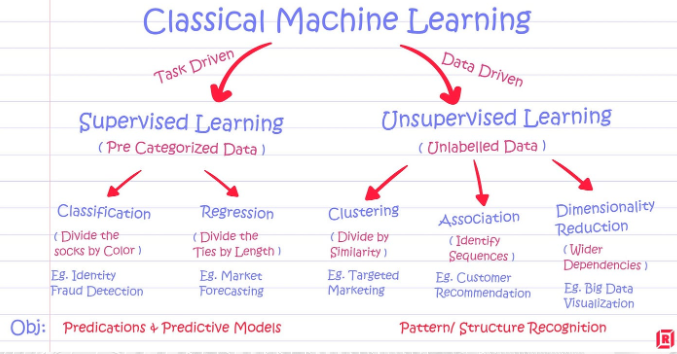

### Supervised

Target/label is given, e.g.

|Height | Weight (Label) |
| --- | ------ |
| 180 | 80 |
| 160 | 60 |
| 170 | 70 |
| 190 | 90 |

Task: Given height (feature/attribute), predict the weight

Example: Linear regression, logistic regression, decision tree, random forest, support vector machine, neural network

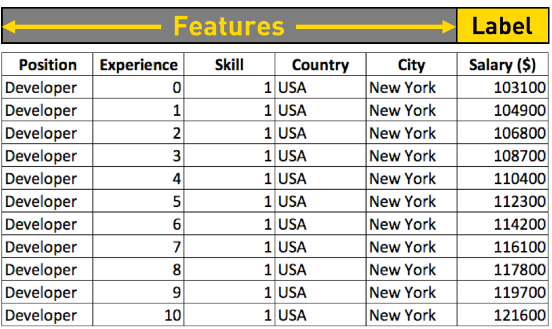

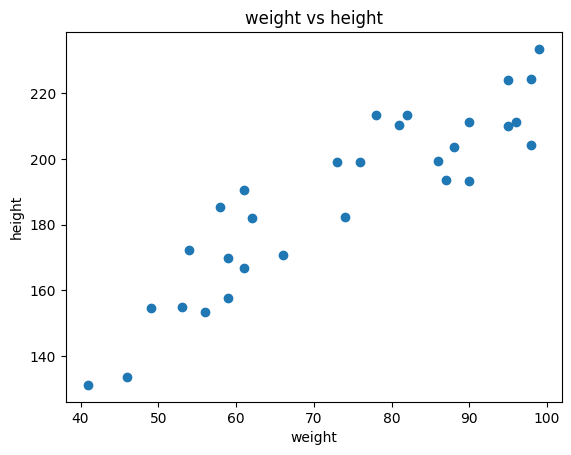

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

weight = np.random.randint(40, 100, 30)
height = np.sqrt(weight / 20) * 100 + np.random.randint(-20, 20, 30)

# plot
plt.scatter(weight, height)
plt.xlabel('weight')
plt.ylabel('height')
plt.title('weight vs height')
plt.show()

Problem: How to predict the weight of a person with height 175cm?

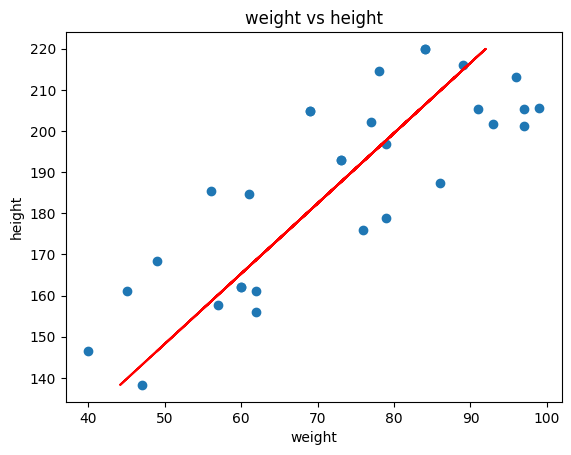

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

weight = np.random.randint(40, 100, 30)
height = np.sqrt(weight / 20) * 100 + np.random.randint(-20, 20, 30)

# implement linear regression using scikit to predict weight from height
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(height.reshape(-1, 1), weight)
weight_pred = model.predict(height.reshape(-1, 1))


# plot
plt.scatter(weight, height)
plt.xlabel('weight')
plt.ylabel('height')
plt.title('weight vs height')

# plot the regression line
plt.plot(weight_pred, height, color='red')
plt.show()



In [3]:
model.predict([[175]])

array([65.66096175])

### Unsupervised

Label is not given, the task is to find the pattern in the data, e.g. anomaly detection, clustering




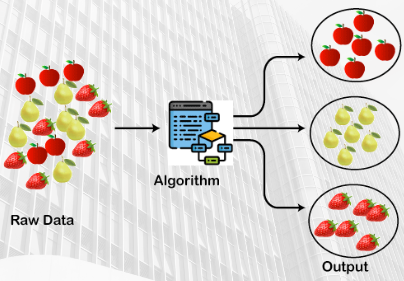

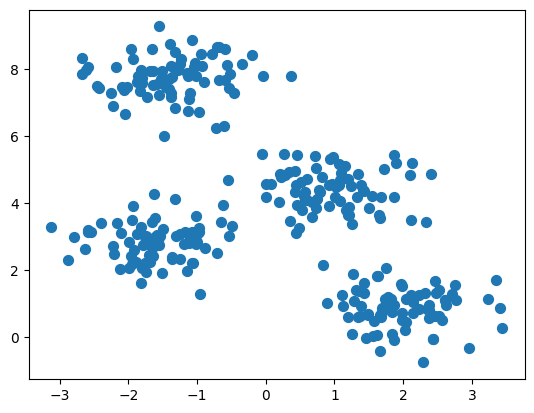

In [4]:
# Create a sample of clustering data

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

Without any label or target, predict which data belongs to which cluster

/home/steve/.conda/envs/skill-academy-ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


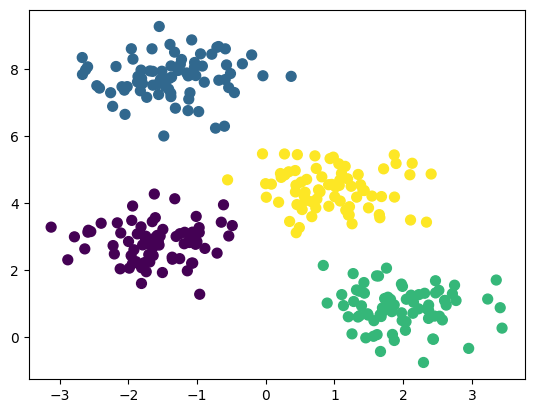

In [5]:
# Create a sample of clustering data

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Implement K-NN clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.show()


## Overfitting

The model doesn't generalize well, it memorizes the training data

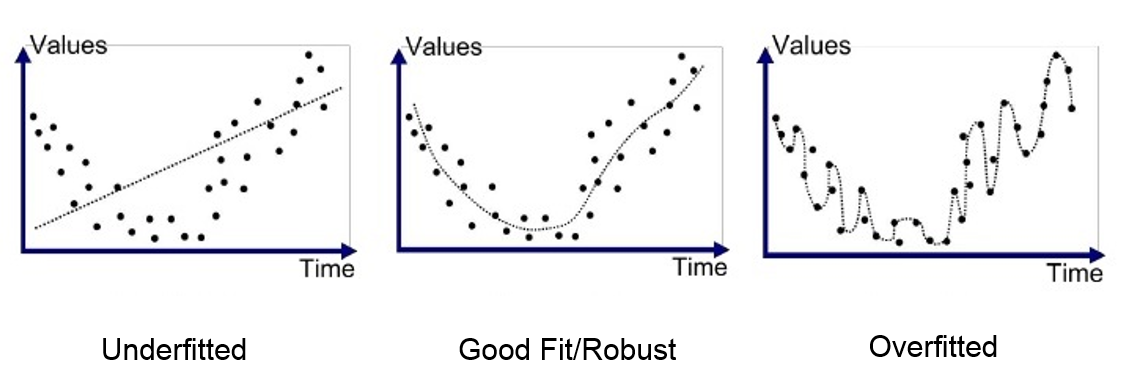

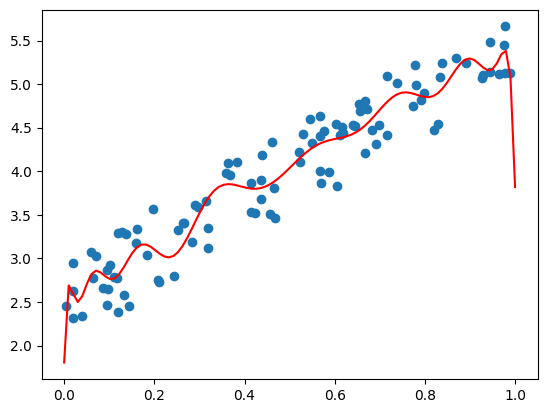

In [6]:
# Create a sample X and Y data

import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# Generate sample data
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Make a overfit regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(20), LinearRegression())
model.fit(X, y)

# Plot the data
plt.scatter(X, y)

# draw the model
X_test = np.linspace(0, 1, 100)
y_pred = model.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_pred, color='red')

plt.show()

cek overfitting
- membandingkan performa model saat training dan saat testing
- performa di training 90% tapi di testing 70% --> indikasi pverfiot
- normal/bagus train 81% test 76%
- underfit training 55% test 50%

## Model Evaluation and Validations



### separate training and testing datasets
- stratify

total data 1000

data training --> 70 - 80% total data --> 800
data testing --> 100
data validation --> 100

data training
kategori A 500
kategori B 150
kategori C 125
kategori D 7

data testing
kategori A 110
kategori B 180
kategori C 25
kategori D 3

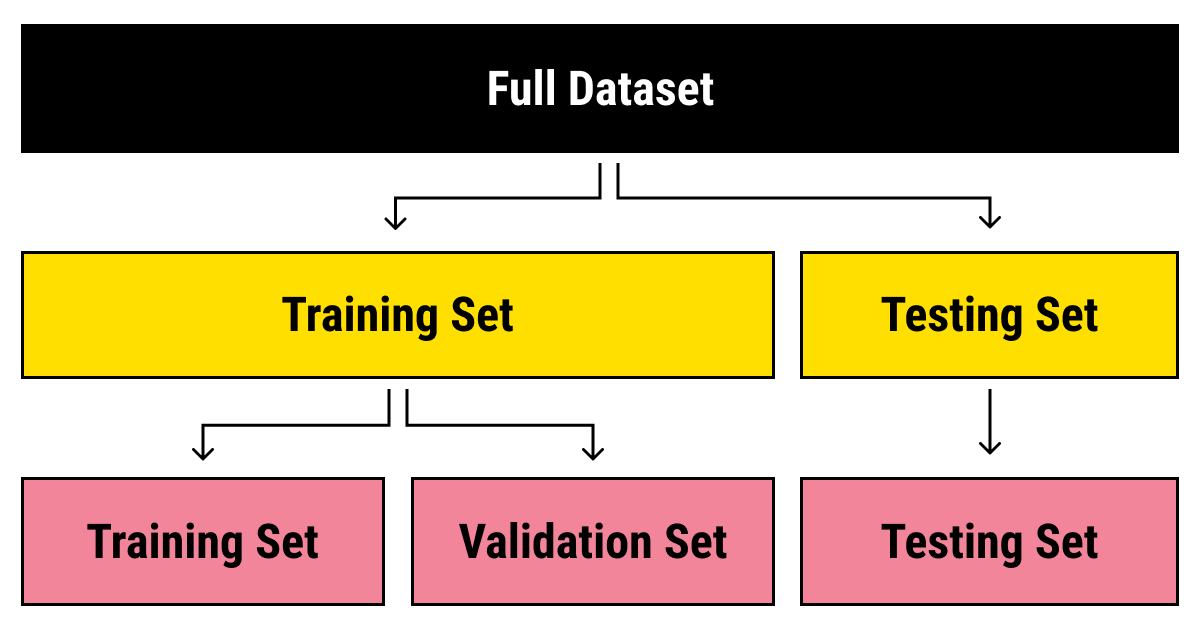

To prevent overfitting, we need to have a separate data to evaluate the model

One way to do it is to split the data into two sets:

- Training set: used to train the model
- Test set: used to evaluate the model

When overfitting happen, the model will perform well on the training set but perform poorly on the test set

To split the data, we can do it manually or use train_test_split function from sklearn

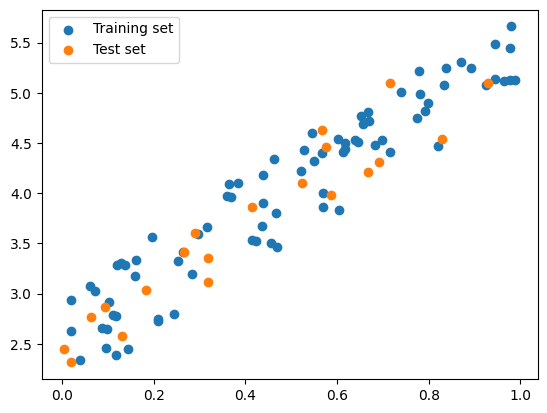

In [7]:
# Split the data into training and test set manually

import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# Generate sample data
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Split the data into training and test set manually
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]

# Plot the training and test set
plt.scatter(X_train, y_train, label='Training set')
plt.scatter(X_test, y_test, label='Test set')
plt.legend()
plt.show()

But be careful, the data should be shuffled first before splitting

Otherwise, the model will be trained on the same data distribution

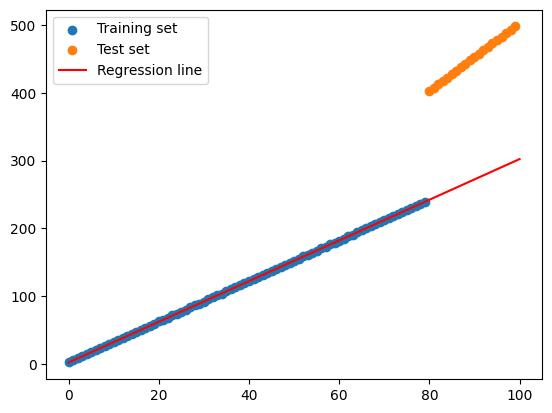

In [8]:
# Split the data into training and test set manually

import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# Generate sample data
# X being a 100 x 1 matrix, ordered from 0 to 100
X = np.arange(100).reshape(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)
y[X >= 80] = 2 + 5 * X[X >= 80].flatten() + np.random.rand(len(X[X >= 80]))

# Split the data into training and test set manually
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the training and test set
plt.scatter(X_train, y_train, label='Training set')
plt.scatter(X_test, y_test, label='Test set')

# Plot the regression line
X_test = np.linspace(0, 100, 100)
y_pred = model.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_pred, color='red', label='Regression line')

plt.legend()

plt.show()

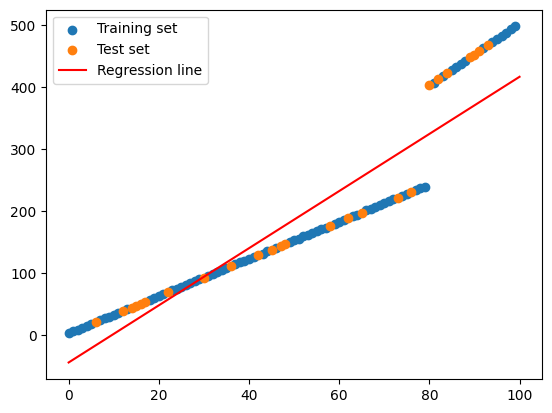

In [9]:
# Split the data into training and test set manually

import numpy as np
import matplotlib.pyplot as plt

# set seed
np.random.seed(0)

# Generate sample data
# X being a 100 x 1 matrix, ordered from 0 to 100
X = np.arange(100).reshape(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)
y[X >= 80] = 2 + 5 * X[X >= 80].flatten() + np.random.rand(len(X[X >= 80]))

# Split the data into training and test using scikit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True) # Make sure it's shuffled

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the training and test set
plt.scatter(X_train, y_train, label='Training set')
plt.scatter(X_test, y_test, label='Test set')

# Plot the regression line
X_test = np.linspace(0, 100, 100)
y_pred = model.predict(X_test.reshape(-1, 1))
plt.plot(X_test, y_pred, color='red', label='Regression line')

plt.legend()

plt.show()

optimization techniques --> GA
- MIN atau MAX
- contsraints

model 1. computer vision --> ngedeteksi volume kendaraan --> 100m3
model 2. ML regression buat memprediksi waktu lampu merah (imnputanya dari model 1) --> 5 detik

### Cross Validation

Cross validation is a technique to evaluate the model by splitting the data into training set and test set **multiple times**.

For example: 5-fold cross validation

- Split the data into 5 folds
- Train the model using 4 folds, evaluate the model using the remaining fold
- Repeat the process 5 times, each time use different fold as test set
- Calculate the average score

![Cross Validation](https://upload.wikimedia.org/wikipedia/commons/b/b5/K-fold_cross_validation_EN.svg)

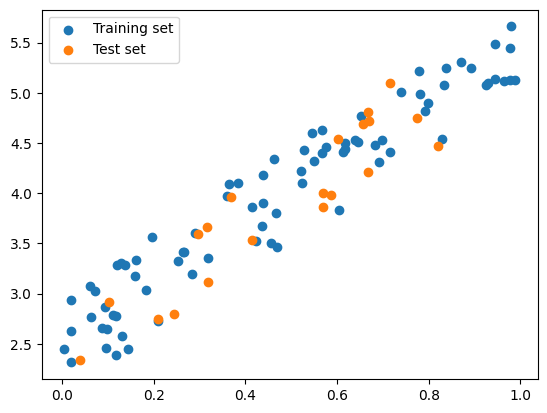

Fold score: 0.83


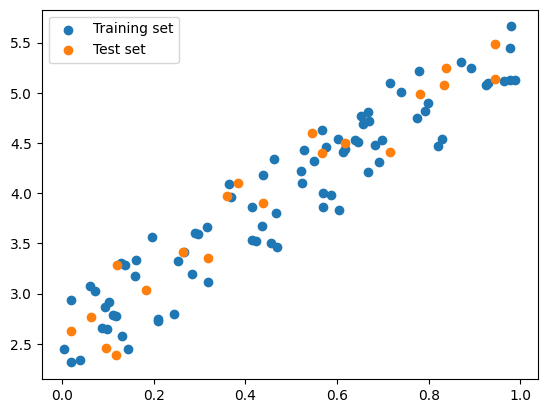

Fold score: 0.93


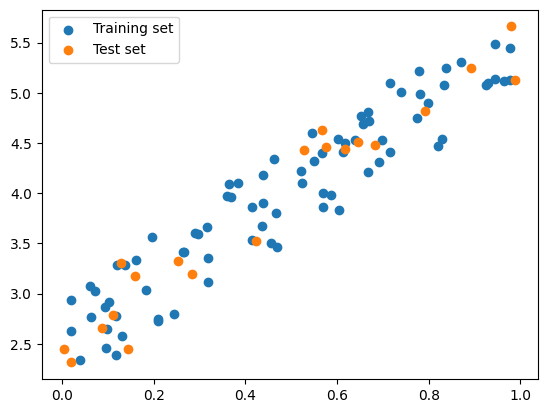

Fold score: 0.94


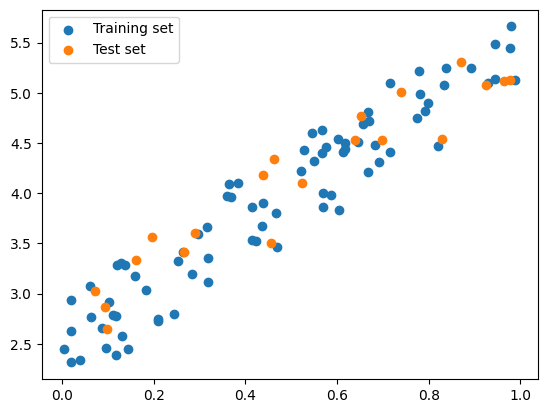

Fold score: 0.87


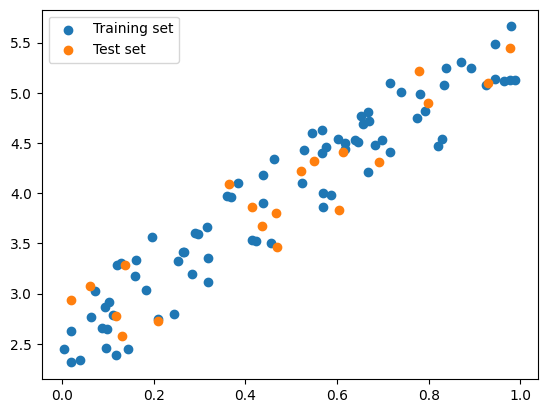

Fold score: 0.88
Overall score: 0.89


In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Initialize the linear regression model
model = LinearRegression()

# Initialize the 5-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True)

# Train and evaluate the model on each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data for this fold
    model.fit(X_train, y_train)

    # Evaluate the model on the test data for this fold
    score = model.score(X_test, y_test)

    # Draw the plot
    plt.scatter(X_train, y_train, label='Training set')
    plt.scatter(X_test, y_test, label='Test set')

    # Show the plot
    plt.legend()
    plt.show()

    # Print the score for this fold
    print(f"Fold score: {score:.2f}")

# Compute the overall score across all folds
scores = cross_val_score(model, X, y, cv=kf)
print(f"Overall score: {np.mean(scores):.2f}")

5 fold --> 5 split

decision tree

split 1 --> model 1 --> prediksi 1
split 2 --> model 2 --> prediksi 2
split 3 --> model 3 --> prediksi 3
split 4 --> model 4 --> prediksi 4
split 5 --> model 5 --> prediksi 5
dst dst

## Supervised Learning --> Regression vs Classification

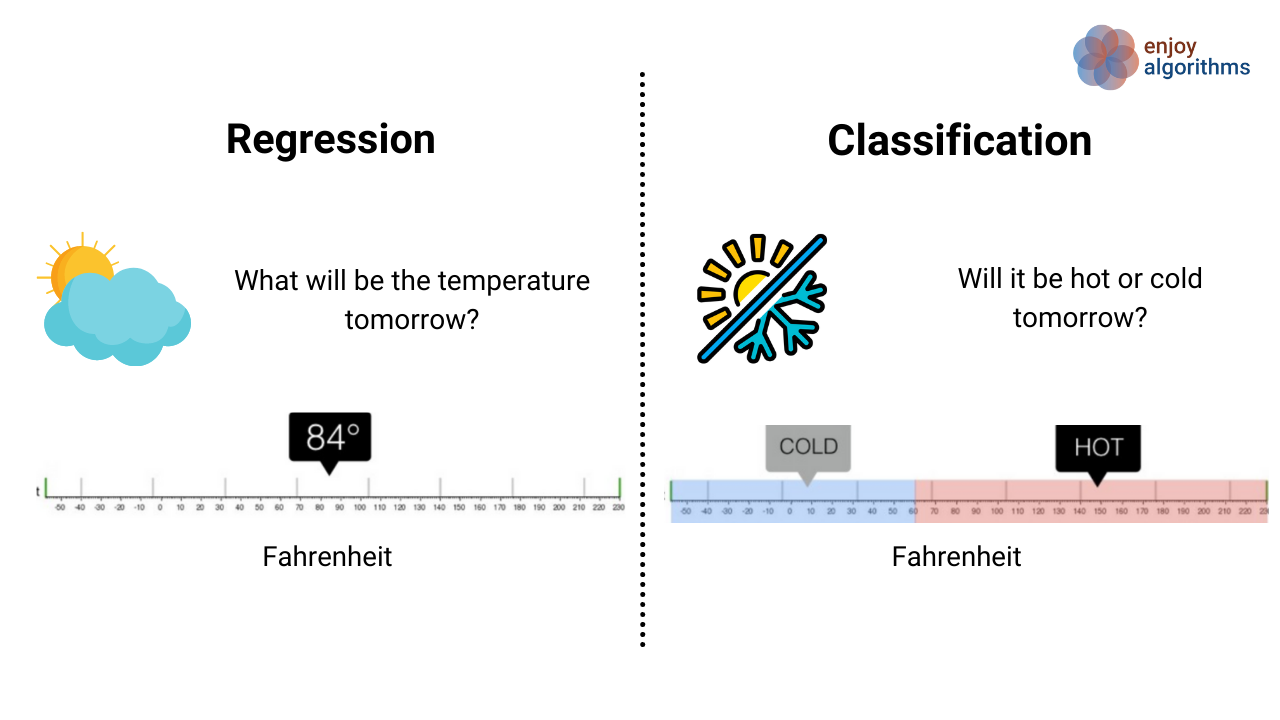

### Regression

Predict continuous value, e.g. predict the weight of a person (as shown in the supervised learning example)

### Classification

Classify the data into different classes, e.g. classify the email into spam or not spam

In [11]:
# Download MNIST dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=True)


/home/steve/.conda/envs/skill-academy-ml/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
X = mnist['data']
y = mnist['target']

print(X.shape, y.shape)

(70000, 784) (70000,)


In [13]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

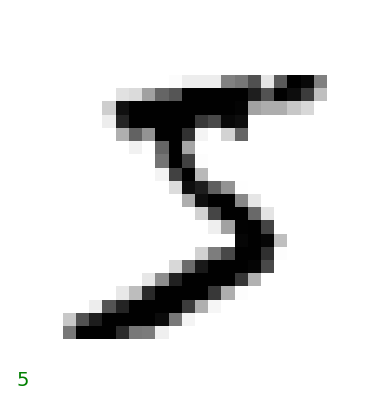

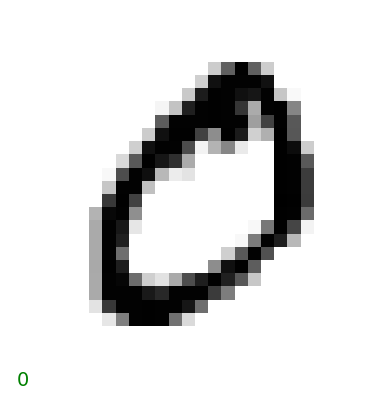

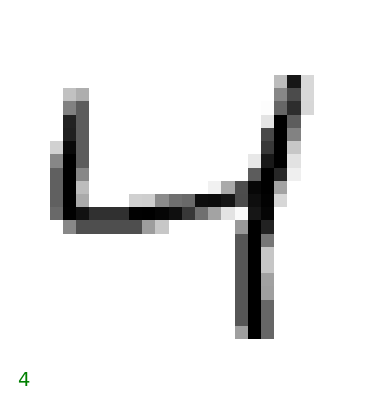

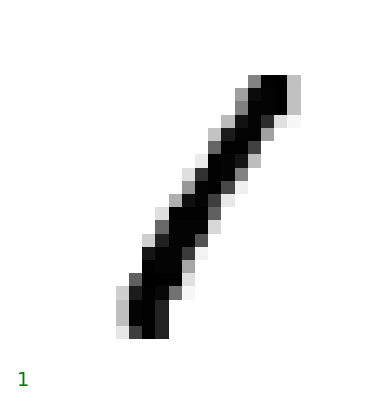

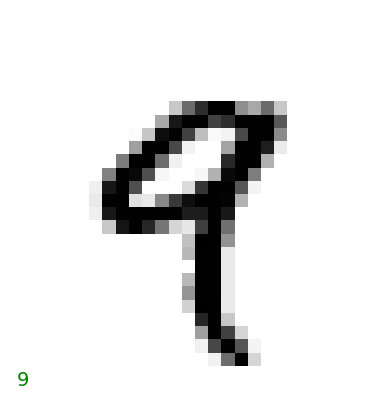

In [15]:
# Plot the first 20 images

import matplotlib.pyplot as plt

for i in range(5):
    some_digit = X.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, y[i], fontsize=14, color='g')
    plt.show()

This is classification problem.

Given images, classify the images into correct numbers

regresi --> MAE MSE RMSE MAPE

In [16]:
data_aktual = 50
data_prediksi = 100

MAE = 50 - 100 --> 50 M
MSE = (50-100)^2 --> 2500 M2
RMSE = 2500^0.5 --> 50 M

SyntaxError: invalid syntax (3714396733.py, line 4)

## How to evaluate classification model
### Confusion Matrix

Classification matrix needs different metrics to evaluate the model. And the objective metrics can be different for different problems.

Confusion matrix is a table to visualize the performance of the classification model

Example of Confusion Matrix

| | Predicted: Not Spam | Predicted: Spam |
| --- | ------ | ------ |
| Actual: Not Spam | True Negative | False Positive |
| Actual: Spam | False Negative | True Positive |


1 --> pos (survived)
0 --> neg (not survived)

In [17]:
import matplotlib.pyplot as plt

# split the data into train and test
train_size = 60000
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

is_7_train = train_y == '7'
is_7_test = test_y == '7'

# Train the model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_X, is_7_train)

SGDClassifier(random_state=42)

In [18]:
# Train the model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(train_X, is_7_train)

# Draw confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = sgd_clf.predict(test_X)
cm = confusion_matrix(is_7_test, y_pred)
print(cm)

[[8793  179]
 [  79  949]]


In [19]:
TN = 8902
TP = 921
FN = 107
FP = 70 # -> actual not spam predicted spam

#### False Positive

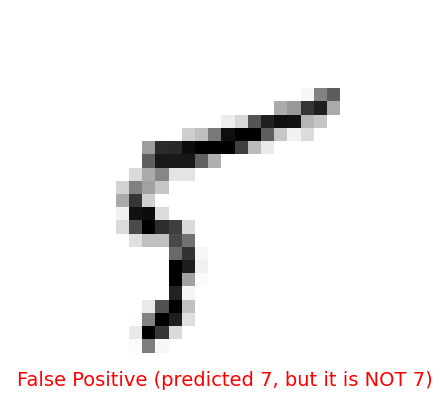

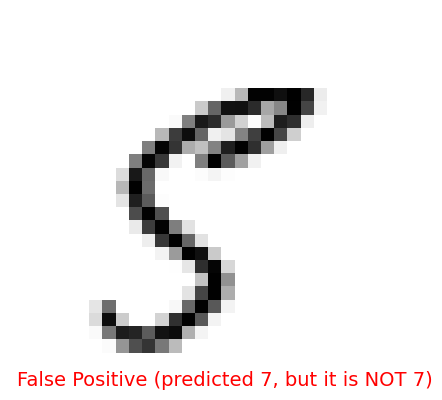

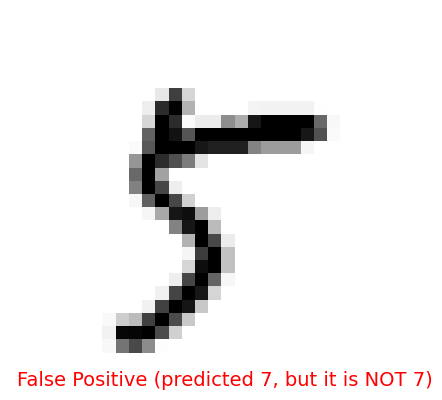

In [20]:
# Draw the false positive

import matplotlib.pyplot as plt

false_positive = (is_7_test == False) & (y_pred == True)
false_positive_images = test_X[false_positive]

for i in range(3):
    some_digit = false_positive_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'False Positive (predicted 7, but it is NOT 7)', fontsize=14, color='r')
    plt.show()

#### False Negative

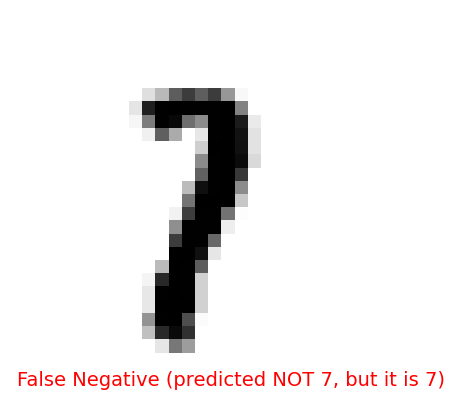

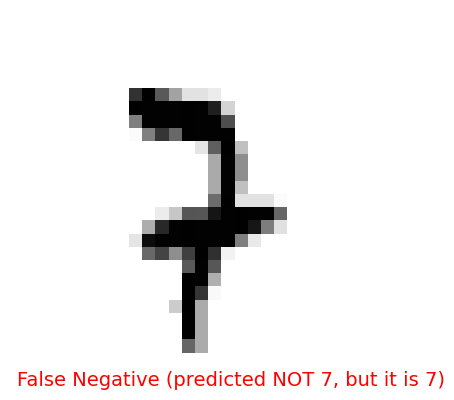

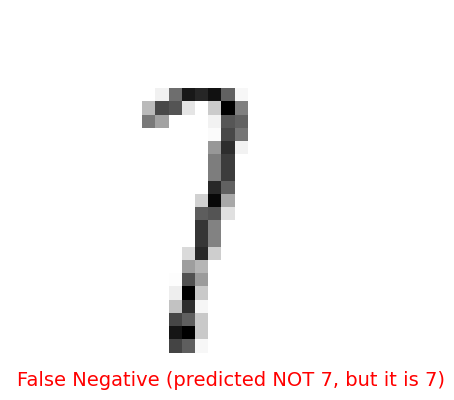

In [21]:
# Draw the false negative

import matplotlib.pyplot as plt

false_negative = (is_7_test == True) & (y_pred == False)
false_negative_images = test_X[false_negative]

for i in range(3):
    some_digit = false_negative_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'False Negative (predicted NOT 7, but it is 7)', fontsize=14, color='r')
    plt.show()

#### True Negative

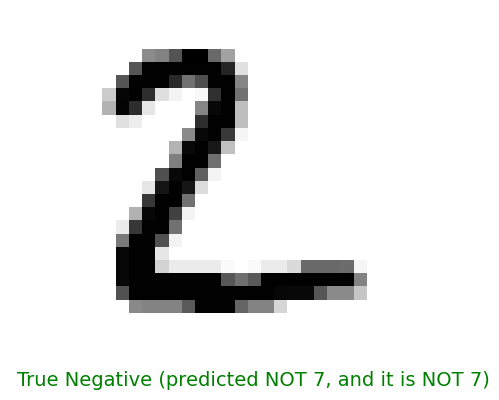

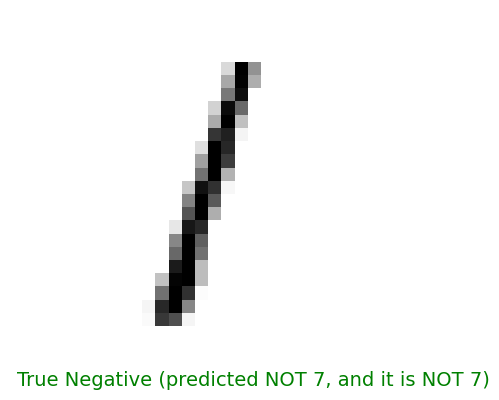

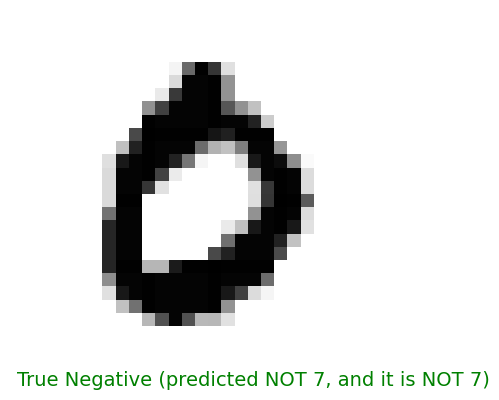

In [22]:
# Draw the true negative

import matplotlib.pyplot as plt

true_negative = (is_7_test == False) & (y_pred == False)
true_negative_images = test_X[true_negative]

for i in range(3):
    some_digit = true_negative_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'True Negative (predicted NOT 7, and it is NOT 7)', fontsize=14, color='g')
    plt.show()

#### True Positive

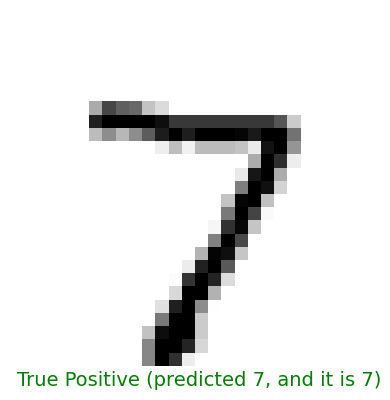

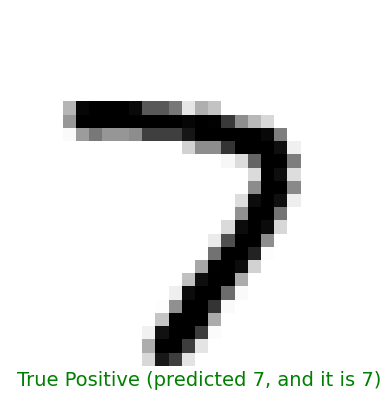

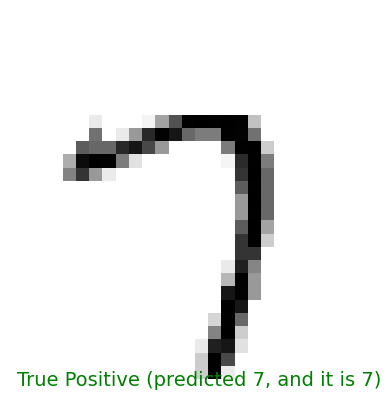

In [23]:
# Draw the true positive

import matplotlib.pyplot as plt

true_positive = (is_7_test == True) & (y_pred == True)
true_positive_images = test_X[true_positive]

for i in range(3):
    some_digit = true_positive_images.iloc[i]
    some_digit_image = some_digit.values.reshape(28, 28)

    plt.imshow(some_digit_image, cmap='binary')
    plt.axis('off')

    # Draw label y on the bottom
    plt.text(0, 28, 'True Positive (predicted 7, and it is 7)', fontsize=14, color='g')
    plt.show()

## test

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [25]:
TN = 8902
TP = 921
FN = 107
FP = 70 # -> actual not spam predicted spam

In [26]:
accuracy = (TN+TP) / (TN+TP+FP+FN)
accuracy

0.9823

In [27]:
precision = TP / (TP + FP)
precision

0.929364278506559

In [28]:
recall = TP / (TP + FN)
recall

0.8959143968871596

In [29]:
accuracy_score(is_7_test, y_pred)

0.9742

### Why not use accuracy?

Accuracy may not be a good metric for classification problem, because the data can be imbalanced.

For example:

- 99% of the email is not spam
- 1% of the email is spam

If the model always predict the email as not spam, the accuracy is 99%. But the model is not useful at all.

Confusion Matrix:

| | Predicted: Not Spam | Predicted: Spam |
| --- | ------ | ------ |
| Actual: Not Spam | 99 | 0 |
| Actual: Spam | 1 | 0 |

Or in our MNIST example:

When we want to classify if the image is number 7 or not, a model that always predict the image as not 7 will have 90% accuracy.

Confusion Matrix:

| | Predicted: Not 7 | Predicted: 7 |
| --- | ------ | ------ |
| Actual: Not 7 | 90 | 0 |
| Actual: 7 | 10 | 0 |


### Precision & Recall

We need other metrics!

\begin{align*}
\text{Recall} &= \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}} \\
\text{Precision} &= \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}
\end{align*}

![precision-and-recall.png](https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/precision-and-recall-min.png)
Source: Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition


Example:

| | Predicted: Not 7 | Predicted: 7 |
| --- | ------ | ------ |
| Actual: Not 7 | 90 | 0 |
| Actual: 7 | 10 | 0 |

- Recall = 0 / (0 + 10) = 0
- Precision = 0 / (0 + 0) = 0

#### Perfect Recall

Confusion Matrix:

| | Predicted: Not 7 | Predicted: 7 |
| --- | ------ | ------ |
| Actual: Not 7 | 0 | 90 |
| Actual: 7 | 0 | 10 |

If our model always predict ALL image as 7, the recall will be 100% (10 / (10 + 0) = 1).

Perfect recall means that the model will never miss any 7, but it will also predict many non-7 as 7.

```
Q: Is "7" seven?
A: Yes, it is seven
Q: Is "7" seven?
A: Yes, it is seven
Q: Is "8" seven?
A: Yes, it is seven
Q: Is "9" seven?
A: Yes, it is seven
```

#### Perfect Precision

Confusion Matrix:

| | Predicted: Not 7 | Predicted: 7 |
| --- | ------ | ------ |
| Actual: Not 7 | 90 | 0 |
| Actual: 7 | 9 | 1 |

If our model is very careful and only predict the image as 7 when **it is very sure**, we will have a perfect precision.

Perfect precision means that when the model predict the image as 7, it is actually 7. But the model may miss a lot of 7s.

```
Q: Is "7" seven?
A: Yes, it is seven
Q: Is "8" seven?
A: No, it is not seven
Q: Is "9" seven?
A: No, it is not seven
Q: Is "7" seven?
A: No, it is not seven
Q: Is "7" seven?
A: No, it is not seven
```

### When to use precision and when to use recall?

It depends on the problem.

**High Recall**

- High Recall is prioritized when the cost of false negative is high.
- A false negative (a person who has cancer but is predicted as not having it) could lead to lack of treatment and dire health implications.
- A false positive (a person who doesn't have cancer but is predicted as having it) would lead to further tests, which might be stressful and costly but isn't immediately harmful.

**High Precision**

- High Precision is prioritized when the cost of false positives is high.
- A false positive (a legitimate transaction is incorrectly flagged as fraudulent), can lead to customer frustration.
- A false negative (missing a fraudulent transaction) may be deemed more acceptable than annoying or alienating a large number of genuine customers.

### F1 Score

F1 score is a metric that combines precision and recall.

The formula for F1 score is:

$$F1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

The `F1` score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.
